# GD cho hàm một biến

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def cost(x):
    return x**2 + 5*np.sin(x)

def grad(x):
    return 2*x + 5*np.cos(x)

def myGD1(x0, eta):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return x, it

(x1, it1) = myGD1(-5, 0.1)
(x2, it2) = myGD1(5, 0.1)

print('x1 = %f, cost = %f, after %d iterations' %(x1[-1], cost(x1[-1]), it1))
print('x2 = %f, cost = %f, after %d iterations' %(x1[-2], cost(x1[-2]), it2))

x1 = -1.110667, cost = -3.246394, after 11 iterations
x2 = -1.110954, cost = -3.246394, after 29 iterations


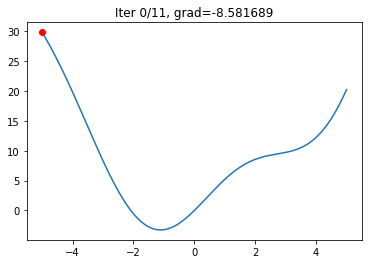

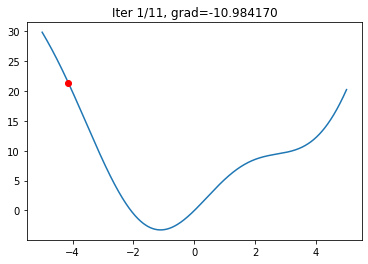

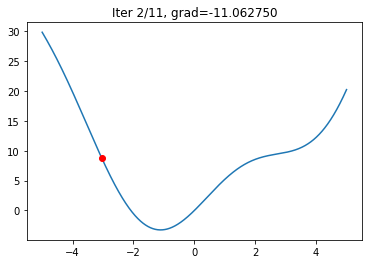

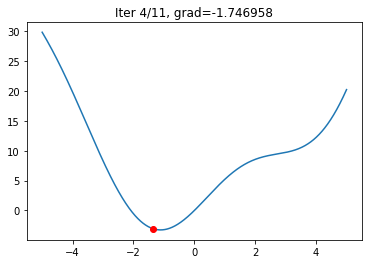

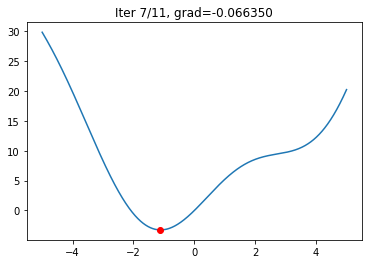

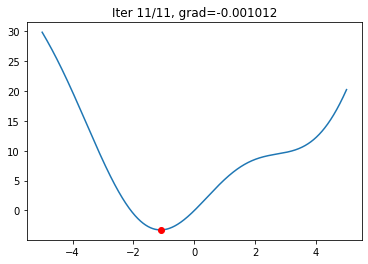

In [64]:
def plot_fn(x, i, it):
    x_fn = np.linspace(-5, 5, 1000)
    plt.plot(x_fn, cost(x_fn))
    plt.plot(x[i], cost(x[i]), 'ro')
    plt.title('Iter %d/%d, grad=%f' %(i, it, grad(x[i])))
    plt.show()
    
plot_fn(x1, 0, it1)
plot_fn(x1, 1, it1)
plot_fn(x1, 2, it1)
plot_fn(x1, 4, it1)
plot_fn(x1, 7, it1)
plot_fn(x1, 11, it1)
    

# GD cho hàm nhiều biến

In [3]:
from sklearn.linear_model import LinearRegression

In [5]:
X = np.random.rand(1000)
y = 4 + 3*X + 0.5*np.random.randn(1000)

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
w = model.coef_[0][0]
b = model.intercept_[0]
print('Solution found by sklearn:', w, b)

ones = np.ones((1000))
Xbar = np.concatenate((ones.reshape(-1, 1), X.reshape(-1, 1)), axis=1)

def cost(w):
    N = Xbar.shape[0]
    return 1/(2*N)*np.linalg.norm(y.reshape(-1, 1) - Xbar.dot(w))**2

def grad(w):
    N = Xbar.shape[0]
    return 1/N*Xbar.T.dot(Xbar.dot(w) - y.reshape(-1, 1))

def numerical_grad(w):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g

def check_grad(w):
    grad1 = grad(w)
    grad2 = numerical_grad(w)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False

print('Gradient check:', check_grad(np.random.rand(2, 1)))

def myGD(w_init, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/w_new.shape[0] < 1e-3:
            break
        w.append(w_new)
    return w, it

w_init = np.array([[2], [1]])
w1, it1 = myGD(w_init, 1)
print('Solution found by GD:', w1[-1], 'after %d iterations' %it1)

Solution found by sklearn: 3.0504535570560525 3.966207349029716
Gradient check: True
Solution found by GD: [[3.98110968]
 [3.02223345]] after 50 iterations


# GD với momentum

Normal GD


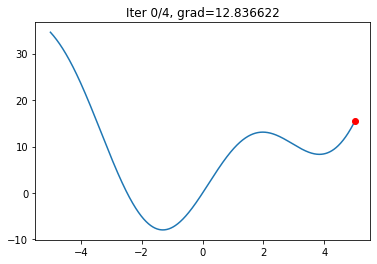

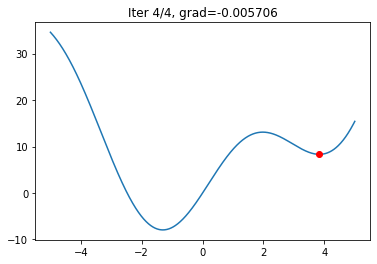

GD with momentum


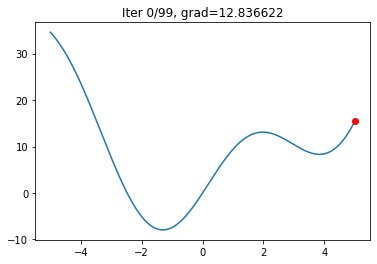

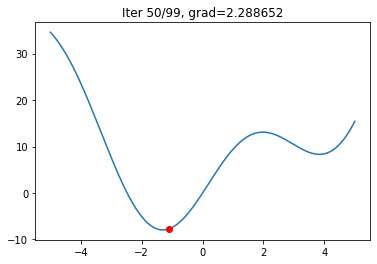

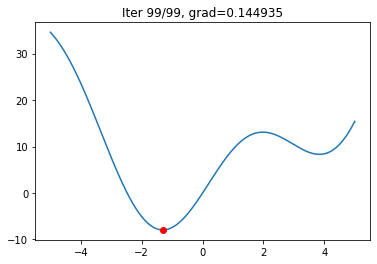

In [78]:
def cost(x):
    return x**2 + 10*np.sin(x)

def grad(x):
    return 2*x + 10*np.cos(x)

x1, it1 = myGD1(5, 0.1)
print('Normal GD')
plot_fn(x1, 0, it1)
# plot_fn(x1, 1, it1)
# plot_fn(x1, 2, it1)
# plot_fn(x1, 3, it1)
plot_fn(x1, 4, it1)

def GD_momentum(theta_init, eta, gamma):
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new)) < 1e-3:
            break
        v_old = v_new
        theta.append(theta_new)
    return theta, it

x2, it2 = GD_momentum(5, 0.1, 0.9)
print('GD with momentum')
plot_fn(x2, 0, it2)
plot_fn(x2, 50, it2)
plot_fn(x2, 99, it2)

# Nesterov Accelerated Gradient

GD NAG


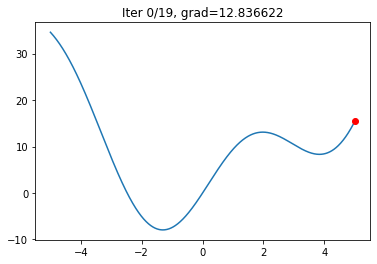

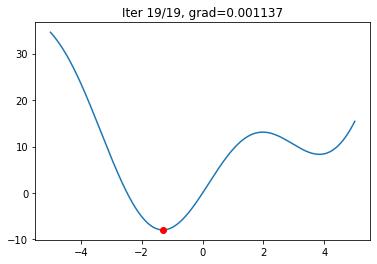

In [81]:
def GD_NAG(theta_init, eta, gamma):
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1] - gamma*v_old)
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new)) < 1e-3:
            break
        v_old = v_new
        theta.append(theta_new)
    return theta, it

x3, it3 = GD_NAG(5, 0.1, 0.9)
print('GD NAG')
plot_fn(x3, 0, it3)
plot_fn(x3, 19, it3)